In [21]:
import pandas as pd
import json
from pprint import pprint

In [3]:
df = pd.read_csv(filepath_or_buffer="hackathon_price_data.csv")
df.head(n=3)

,Mcat Name,Subcat name,PC_ITEM_ID,PC_ITEM_NAME,FK_IM_SPEC_MASTER_DESC,FK_IM_SPEC_OPTIONS_DESC,PC_ITEM_FOB_PRICE,PC_ITEM_MOQ_UNIT_TYPE
0,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",1,Touch Panel,Display Size,"15.6"" to 80 """,5500.0,Piece
1,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",2,Human Machine Interface,Type,Fully Automatic,4500.0,Unit
2,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,Display Type,TFT,12000.0,Unit


In [12]:
df["type-value"] = df.apply(lambda row: row['FK_IM_SPEC_MASTER_DESC'] + "_" + str(row["FK_IM_SPEC_OPTIONS_DESC"]), axis=1)

In [15]:
df = df.drop(['FK_IM_SPEC_MASTER_DESC', 'FK_IM_SPEC_OPTIONS_DESC'], axis=1)

In [16]:
df.head(n=10)

,Mcat Name,Subcat name,PC_ITEM_ID,PC_ITEM_NAME,PC_ITEM_FOB_PRICE,PC_ITEM_MOQ_UNIT_TYPE,type-value
0,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",1,Touch Panel,5500.0,Piece,"Display Size_15.6"" to 80 """
1,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",2,Human Machine Interface,4500.0,Unit,Type_Fully Automatic
2,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,Display Type_TFT
3,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,Model Number/Name_GOT
4,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,Product Type_HMI
5,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,Brand_Mitsubishi
6,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,"Size_5',7.5',10,15"
7,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",3,Mitsubishi HMI,12000.0,Unit,"Screen Size_5,7,10,15"
8,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",4,HMI Touch Panels,10000.0,Unit,Display Type_Digital
9,HMI Touch Panel,"AC Drives, Recorders, Instrumentation Equipmen...",4,HMI Touch Panels,10000.0,Unit,Type_Fully Automatic


In [27]:
dfj = json.loads(df.to_json(orient="records"))
len(dfj)
id_to_specs = {}
for x in dfj:
    xid = x["PC_ITEM_ID"]
    id_to_specs.setdefault(xid, {})
    type_value = x.pop('type-value')
    try:
        xid_type, xid_val = "_".join(type_value.split("_")[:-1]), type_value.split("_")[-1]
        xid_type = xid_type.lower().strip()
        xid_val = xid_val.lower().strip()
        id_to_specs[xid].setdefault(xid_type, [])
        id_to_specs[xid][xid_type].append(xid_val)
    except Exception as e:
        pprint(type_value)
    for each in x.keys():
        id_to_specs[xid].setdefault(each, [])
        id_to_specs[xid][each].append(x[each])
len(id_to_specs)

9392

In [28]:
id_to_specs.keys()[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [31]:
pprint(id_to_specs[1])

{u'Mcat Name': [u'HMI Touch Panel'],
 u'PC_ITEM_FOB_PRICE': [5500.0],
 u'PC_ITEM_ID': [1],
 u'PC_ITEM_MOQ_UNIT_TYPE': [u'Piece'],
 u'PC_ITEM_NAME': [u'Touch Panel'],
 u'Subcat name': [u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units'],
 u'display size': [u'15.6"  to 80 "']}


In [33]:
for x in id_to_specs:
    for each in id_to_specs[x].keys():
        id_to_specs[x][each] = list(set(id_to_specs[x][each]))

In [34]:
id_to_specs[8]

{u'Mcat Name': [u'HMI Touch Panel'],
 u'PC_ITEM_FOB_PRICE': [10000.0],
 u'PC_ITEM_ID': [8],
 u'PC_ITEM_MOQ_UNIT_TYPE': [u'PER PIECE'],
 u'PC_ITEM_NAME': [u'Siemens HMI & Displays'],
 u'Subcat name': [u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units'],
 u'brand': [u'siemens'],
 u'display type': [u'tft'],
 u'screen type': [u'keypad + touch'],
 u'type': [u'manual', u'fully automatic']}

In [35]:
provided_keys = ['Mcat Name', 'PC_ITEM_FOB_PRICE', 'PC_ITEM_ID', 'PC_ITEM_MOQ_UNIT_TYPE', 'PC_ITEM_NAME', 'Subcat name']

In [41]:
for each in id_to_specs:
    x = id_to_specs[each]
    for key in provided_keys:
        id_to_specs[each][key] = id_to_specs[each][key][0]

In [42]:
pprint(id_to_specs[8])

{u'Mcat Name': u'HMI Touch Panel',
 u'PC_ITEM_FOB_PRICE': 10000.0,
 u'PC_ITEM_ID': 8,
 u'PC_ITEM_MOQ_UNIT_TYPE': u'PER PIECE',
 u'PC_ITEM_NAME': u'Siemens HMI & Displays',
 u'Subcat name': u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units',
 u'brand': [u'siemens'],
 u'display type': [u'tft'],
 u'screen type': [u'keypad + touch'],
 u'type': [u'manual', u'fully automatic']}


In [44]:
for i in range(1,20):
    pprint(id_to_specs[i])

{u'Mcat Name': u'HMI Touch Panel',
 u'PC_ITEM_FOB_PRICE': 5500.0,
 u'PC_ITEM_ID': 1,
 u'PC_ITEM_MOQ_UNIT_TYPE': u'Piece',
 u'PC_ITEM_NAME': u'Touch Panel',
 u'Subcat name': u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units',
 u'display size': [u'15.6"  to 80 "']}
{u'Mcat Name': u'HMI Touch Panel',
 u'PC_ITEM_FOB_PRICE': 4500.0,
 u'PC_ITEM_ID': 2,
 u'PC_ITEM_MOQ_UNIT_TYPE': u'Unit',
 u'PC_ITEM_NAME': u'Human Machine Interface',
 u'Subcat name': u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units',
 u'type': [u'fully automatic']}
{u'Mcat Name': u'HMI Touch Panel',
 u'PC_ITEM_FOB_PRICE': 12000.0,
 u'PC_ITEM_ID': 3,
 u'PC_ITEM_MOQ_UNIT_TYPE': u'Unit',
 u'PC_ITEM_NAME': u'Mitsubishi HMI',
 u'Subcat name': u'AC Drives, Recorders, Instrumentation Equipments and Control Panels & Units',
 u'brand': [u'mitsubishi'],
 u'display type': [u'tft'],
 u'model number/name': [u'got'],
 u'product type': [u'hmi'],
 u'screen size': [u'5,7,10,15'],
 u'siz

In [46]:
mcat_to_specs = {}
for each in id_to_specs:
    x = id_to_specs[each]
    mcat = x['Mcat Name'].lower().strip()
    mcat_to_specs.setdefault(mcat, [])
    mcat_to_specs[mcat].append(x)
len(mcat_to_specs)

100

In [47]:
mcat_to_specs.keys()[:10]

[u'steam iron',
 u'copper cables',
 u'single phase induction motors',
 u'bag filling machine',
 u'mens capri',
 u'bottle filling machines',
 u'wooden crates',
 u'busbar systems',
 u'coffee makers',
 u'belt conveyors']

In [48]:
mcat_to_specs['steam iron']

[{u'Mcat Name': u'Steam Iron',
  u'PC_ITEM_FOB_PRICE': 2280.0,
  u'PC_ITEM_ID': 4539,
  u'PC_ITEM_MOQ_UNIT_TYPE': u'Unit',
  u'PC_ITEM_NAME': u'Leaf Base Steam Iron',
  u'Subcat name': u'Washing Machine, Microwave Oven, Induction Cooker & Home Appliances',
  u'power': [u'1200 w']},
 {u'Mcat Name': u'Steam Iron',
  u'PC_ITEM_FOB_PRICE': 500.0,
  u'PC_ITEM_ID': 4540,
  u'PC_ITEM_MOQ_UNIT_TYPE': u'Piece',
  u'PC_ITEM_NAME': u'Steam Iron',
  u'Subcat name': u'Washing Machine, Microwave Oven, Induction Cooker & Home Appliances',
  u'brand': [u'havells, philips, bajaj'],
  u'color': [u'any'],
  u'iron type': [u'any'],
  u'model number': [u'any'],
  u'power': [u'any']},
 {u'Mcat Name': u'Steam Iron',
  u'PC_ITEM_FOB_PRICE': 2200.0,
  u'PC_ITEM_ID': 4541,
  u'PC_ITEM_MOQ_UNIT_TYPE': u'Piece',
  u'PC_ITEM_NAME': u'Steam Boiler Iron',
  u'Subcat name': u'Washing Machine, Microwave Oven, Induction Cooker & Home Appliances',
  u'brand': [u'steamfab'],
  u'color': [u'white & blu'],
  u'iron type': 

In [49]:
unit_grouped = {}
for each in mcat_to_specs:
    unit_grouped.setdefault(each, {})
    tmp = {}
    for x in mcat_to_specs[each]:
        item_unit = x['PC_ITEM_MOQ_UNIT_TYPE'].lower().strip()
        tmp.setdefault(item_unit, [])
        tmp[item_unit].append(x)
    unit_grouped[each] = tmp
len(unit_grouped)

100

In [54]:
pprint(unit_grouped['steam iron'].keys())

[u'box', u'set', u'no', u'number', u'foot', u'piece', u'unit']


In [55]:
unit_grouped['steam iron']['no']

[{u'Mcat Name': u'Steam Iron',
  u'PC_ITEM_FOB_PRICE': 185000.0,
  u'PC_ITEM_ID': 4555,
  u'PC_ITEM_MOQ_UNIT_TYPE': u'No',
  u'PC_ITEM_NAME': u'Steam buster car wash',
  u'Subcat name': u'Washing Machine, Microwave Oven, Induction Cooker & Home Appliances',
  u'brand': [u'any'],
  u'features': [u'car clening desborad engin under body no paint detion'],
  u'power': [u'9 bar']}]

In [57]:
m = -1
max_l = -1
max_mcat = []
max_unit = ""
for each in unit_grouped:
    for unit in unit_grouped[each]:
        max_mcat.append([each, unit, len(unit_grouped[each][unit])])

In [58]:
max_mcat

[[u'steam iron', u'box', 3],
 [u'steam iron', u'set', 3],
 [u'steam iron', u'no', 1],
 [u'steam iron', u'number', 3],
 [u'steam iron', u'foot', 1],
 [u'steam iron', u'piece', 28],
 [u'steam iron', u'unit', 5],
 [u'copper cables', u'box', 2],
 [u'copper cables', u'packet', 1],
 [u'copper cables', u'piece(s)', 1],
 [u'copper cables', u'bundle', 4],
 [u'copper cables', u'kilogram', 1],
 [u'copper cables', u'meter(s)', 1],
 [u'copper cables', u'meter', 43],
 [u'copper cables', u'piece', 42],
 [u'copper cables', u'roll', 2],
 [u'copper cables', u'unit', 3],
 [u'wooden crates', u'box', 1],
 [u'wooden crates', u'square fee', 1],
 [u'wooden crates', u'square feet', 7],
 [u'wooden crates', u'square inch', 2],
 [u'wooden crates', u'number', 1],
 [u'wooden crates', u'kilogram', 3],
 [u'wooden crates', u'pieces', 1],
 [u'wooden crates', u'feet', 2],
 [u'wooden crates', u'cubic feet', 16],
 [u'wooden crates', u'per nos', 1],
 [u'wooden crates', u'inch', 1],
 [u'wooden crates', u'piece', 22],
 [u'wo

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [61]:
test_set = unit_grouped['ladies palazzo']['piece']

In [62]:
len(test_set)

826

In [64]:
price = [x['PC_ITEM_FOB_PRICE'] for x in test_set]

In [66]:
y = [0]*len(price)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


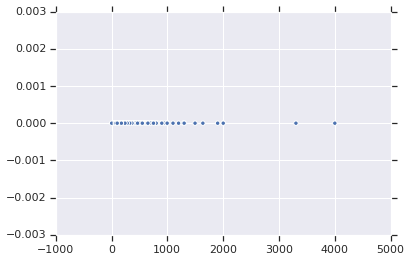

In [67]:
plt.scatter(price,y)

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
price_arr = [[x] for x in price]
labels = kmeans.fit(price_arr).predict(price_arr)

In [88]:
X = np.array(price_arr)
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
labels = kmeans.fit(X).predict(X)

In [90]:
plt.scatter(X[:,0], c=labels, s=40, cmap='viridis')

TypeError: scatter() takes at least 2 arguments (4 given)

In [69]:
from sklearn.mixture import GMM
gmm = GMM(3, n_iter=1)

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [70]:
price_arr = [[x] for x in price]

In [123]:
X = np.array(price_arr)
gmm = GMM(n_components=10).fit(X)
labels = gmm.predict(X)

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_densit

In [124]:
probs = gmm.predict_proba(X)

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [125]:
probs[:5].round(3)

array([[0.169, 0.   , 0.327, 0.   , 0.304, 0.02 , 0.   , 0.   , 0.18 ,
        0.   ],
       [0.   , 0.865, 0.   , 0.   , 0.   , 0.135, 0.   , 0.   , 0.   ,
        0.   ],
       [0.169, 0.   , 0.327, 0.   , 0.304, 0.02 , 0.   , 0.   , 0.18 ,
        0.   ],
       [0.162, 0.   , 0.328, 0.   , 0.292, 0.022, 0.   , 0.   , 0.196,
        0.   ],
       [0.162, 0.   , 0.328, 0.   , 0.292, 0.022, 0.   , 0.   , 0.196,
        0.   ]])

In [97]:
X[:5]

array([[ 395.],
       [1300.],
       [ 395.],
       [ 399.],
       [ 399.]])

In [98]:
len(X)

826

In [100]:
X.shape

(826, 1)

In [101]:
Y = np.array([[i] for i in range(826)])
Y.shape

(826, 1)

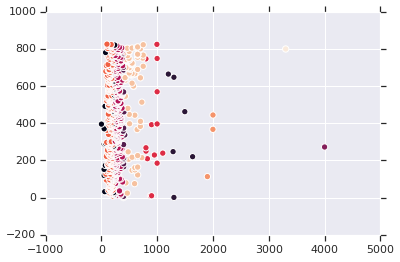

In [126]:
plt.scatter(X, Y, c=labels, s=40);

In [127]:
size = 50 * probs.max(1) ** 10
size.shape

(826,)

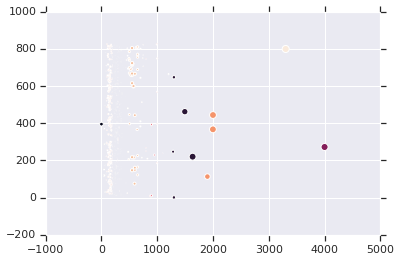

In [128]:
plt.scatter(X,Y, c=labels, s=size)